In [1]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline
%load_ext autoreload 

In [2]:
# Default figure size
plt.rcParams['figure.figsize'] = (10,7)
%autoreload 2
from utilities import *

In [3]:
params = params_init([2,3,3])
print("W1 =\n %s" %(params['W1']))
print("b1 =\n %s" %(params['b1']))
print("W2 =\n %s" %(params['W2']))
print("b2 =\n %s" %(params['b2']))

W1 =
 [[ 1.81855589  1.00061016]
 [ 1.18362556  0.83260838]
 [-0.84373564 -0.09878221]]
b1 =
 [[0.]
 [0.]
 [0.]]
W2 =
 [[-0.58880422  0.82345398 -1.06395998]
 [ 0.09780964 -0.66907348  1.02519104]
 [-0.12336589  0.0440669  -1.32712586]]
b2 =
 [[0.]
 [0.]
 [0.]]


In [4]:
X = np.array([[5,7,10],[2,3,5]])
print(X)
output,caches = forward_prop(X,params)
print (output)
print (np.sum(output,axis=0))

[[ 5  7 10]
 [ 2  3  5]]
[[6.67296773e-01 7.44104695e-01 8.42229138e-01]
 [1.64805156e-02 3.74181815e-03 2.94723368e-04]
 [3.16222711e-01 2.52153486e-01 1.57476138e-01]]
[1. 1. 1.]


In [5]:
caches

{'A0': array([[ 5,  7, 10],
        [ 2,  3,  5]]), 'A1': array([[11.09399979, 15.73172174, 23.18860974],
        [ 7.58334458, 10.78320408, 15.99929753],
        [ 0.        ,  0.        ,  0.        ]]), 'Z1': array([[11.09399979, 15.73172174, 23.18860974],
        [ 7.58334458, 10.78320408, 15.99929753],
        [-4.4162426 , -6.20249607, -8.9312674 ]]), 'Z2': array([[-0.28765856, -0.38343174, -0.47886592],
        [-3.98871463, -5.67604186, -8.43663613],
        [-1.0344467 , -1.46557551, -2.15564409]])}

In [6]:
Y = np.eye(3,3)
print (Y)
cost = costFunction(output,Y)
cost

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2.613728459618913

In [7]:
grads = backprop(output,Y,caches,params,lamb=0)
grads

{'dA1': array([[ 0.15849792, -0.56668278, -0.39194053],
        [-0.27105752,  1.29041753,  0.65621233],
        [-0.04878874, -2.14769199,  0.22233926]]),
 'dW1': array([[-2.36456506, -1.11425172],
        [ 4.74658614,  2.20339974],
        [ 0.        ,  0.        ]]),
 'dW2': array([[ 9.18172043,  6.32530138,  0.        ],
        [-5.16106248, -3.53772083,  0.        ],
        [-4.02065795, -2.78758055,  0.        ]]),
 'db1': array([[-0.26670846],
        [ 0.55852411],
        [ 0.        ]]),
 'db2': array([[ 0.41787687],
        [-0.32649431],
        [-0.09138255]])}

In [8]:
#Load training data stored in MNIST Format
mndata = MNIST()
mndata.gz = True
images,labels = mndata.load_training()

In [9]:
X = np.array(images).T
Y = np.array(labels)
Y_hot = one_hot(Y)
X.shape,Y_hot.shape

((784, 60000), (10, 60000))

In [10]:
Xnorm = X/255

In [11]:
testX,testY = mndata.load_testing()

In [12]:
testX = np.array(testX).T
testY = np.array(testY)
testX.shape,testY.shape

((784, 10000), (10000,))

In [13]:
test_Xnorm = testX/255

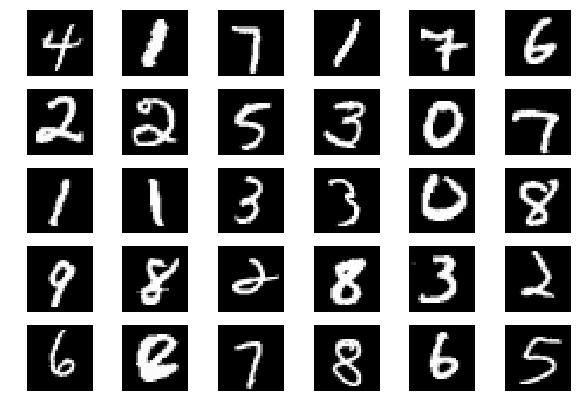

In [14]:
# Plotting 30 random examples from X
indices = np.random.choice(Y.size,30)

fig = plt.figure()
for i in range (30):
    img = X[:,indices[i]].reshape(28,28)
    fig.add_subplot(5,6,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis("off")

plt.show()

In [15]:
def random_mini_batches(X,Y,batch_size = 64):
    
    mini_batches = []
    m = X.shape[1]
    # Shuffle
    permute = np.random.permutation(m)
    X = X[:,permute]
    Y = Y[:,permute]
    
    # Partition
    complete_batches = math.floor(m/batch_size)
    for k in range(complete_batches):
        batch_X = X[:,k*batch_size:(k+1)*batch_size]
        batch_Y = Y[:,k*batch_size:(k+1)*batch_size]
        batch = (batch_X,batch_Y)
        mini_batches.append(batch)
        
    # Handling the end case
    if m % batch_size != 0:
        batch_X = X[:,(k+1)*batch_size:]
        batch_Y = Y[:,(k+1)*batch_size:]
        batch = (batch_X,batch_Y)
        mini_batches.append(batch)
        
    return mini_batches

In [16]:
tempX = np.random.rand(5,20)
tempY = np.random.rand(1,20)>0.5
mini_b =random_mini_batches(tempX,tempY,8)
print ("shape of the 1st mini_batch_X: " + str(mini_b[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_b[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_b[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_b[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_b[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_b[2][1].shape))


shape of the 1st mini_batch_X: (5, 8)
shape of the 2nd mini_batch_X: (5, 8)
shape of the 3rd mini_batch_X: (5, 4)
shape of the 1st mini_batch_Y: (1, 8)
shape of the 2nd mini_batch_Y: (1, 8)
shape of the 3rd mini_batch_Y: (1, 4)


In [17]:
def model(X,Y,layer_dims,alpha=0.01,batch_size=128,num_epochs=1000
          ,lamb=0,print_cost=True,grad_check=False):
    
    params = params_init(layer_dims)
    v,s = init_for_adam(params)
    t = 0
    hist_cost=[]
    
    epoch_choice = np.random.choice(num_epochs,2)
    
    num_batches = np.ceil(X.shape[1]/batch_size)
    
    for i in range(num_epochs):
        epoch_cost = 0 
        minibatches = random_mini_batches(X,Y,batch_size)
        iter_check = 0
        lr = learningRate_decay(alpha,i)
         
        for mini_b in minibatches:
            (mini_x,mini_y) = mini_b
            AL,caches = forward_prop(mini_x,params)
            AL = np.clip(AL,a_min=1e-10,a_max=None)
            reg_term = l2regularization(params,lamb)
            cost = costFunction(AL,mini_y,reg_term)
            epoch_cost += cost 
            grads = backprop(AL,mini_y,caches,params,lamb)
            if grad_check and i in epoch_choice  and iter_check <3:
                gradient_check(mini_x,mini_y,params,grads)
                iter_check +=1
            t += 1
            params,v,s = update_parameters_with_adam(params,grads,v,s,t,lr)
        
        
        hist_cost.append(epoch_cost/num_batches)
        if i%50 == 0 and print_cost:
            print ("Cost after epoch %i: %f" %(i, epoch_cost/num_batches))
            
            
    if grad_check == False:        
        plt.plot(np.squeeze(hist_cost))
        plt.ylabel('Cost')
        plt.xlabel('Epochs')
        plt.title('Starting Learing Rate = '+ str(alpha))
        plt.show()
    
    return params

In [18]:
layer_dims = [X.shape[0],10,Y_hot.shape[0]]
params0 = model(Xnorm,Y_hot,layer_dims,grad_check=True,alpha=0.001,num_epochs=200)

Cost after epoch 0: 0.684243
Your backward propagation works perfectly fine! difference = 7.42655110319944e-09
Your backward propagation works perfectly fine! difference = 6.691855996308466e-09
Your backward propagation works perfectly fine! difference = 5.12675773049153e-09
Your backward propagation works perfectly fine! difference = 8.29155430143648e-09
Your backward propagation works perfectly fine! difference = 7.31761712342141e-09
Your backward propagation works perfectly fine! difference = 5.313707787291777e-09
Cost after epoch 50: 0.160699
Cost after epoch 100: 0.143160
Cost after epoch 150: 0.134988


In [19]:
layer_dims = [X.shape[0],30,20,Y_hot.shape[0]]

Cost after epoch 0: 0.689074
Cost after epoch 50: 0.027582
Cost after epoch 100: 0.006540
Cost after epoch 150: 0.003298
Cost after epoch 200: 0.000420
Cost after epoch 250: 0.000182


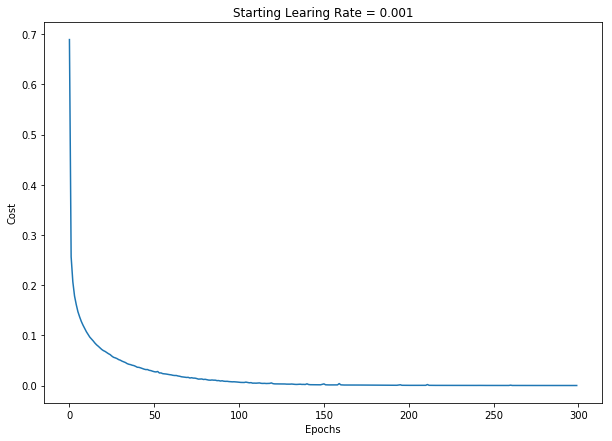

Accuracy on the Training Set: 100.0 %
Accuracy on the Test Set: 96.34 %
Neural Network made errors in predicting 366 samples out of 10000 in the Test Set 


In [20]:
params1 = model(Xnorm,Y_hot,layer_dims,num_epochs=300,
                batch_size=256,alpha=0.001,lamb=0)
accuracy(Xnorm,Y,test_Xnorm,testY,params1)

Cost after epoch 0: 0.847248
Cost after epoch 50: 0.141101
Cost after epoch 100: 0.129894
Cost after epoch 150: 0.125660
Cost after epoch 200: 0.122458
Cost after epoch 250: 0.120910


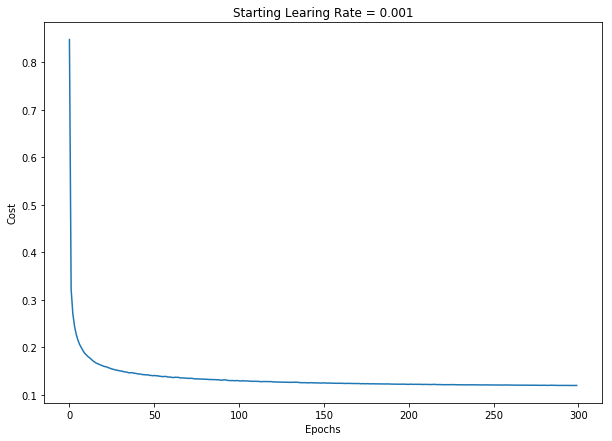

Accuracy on the Training Set: 99.18 %
Accuracy on the Test Set: 97.63 %
Neural Network made errors in predicting 237 samples out of 10000 in the Test Set 


In [21]:
params2 = model(Xnorm,Y_hot,layer_dims,num_epochs=300,
                batch_size=256,alpha=0.001,lamb=0.24)
accuracy(Xnorm,Y,test_Xnorm,testY,params2)

In [22]:
pred_y = predict_multiClass(test_Xnorm,params2)

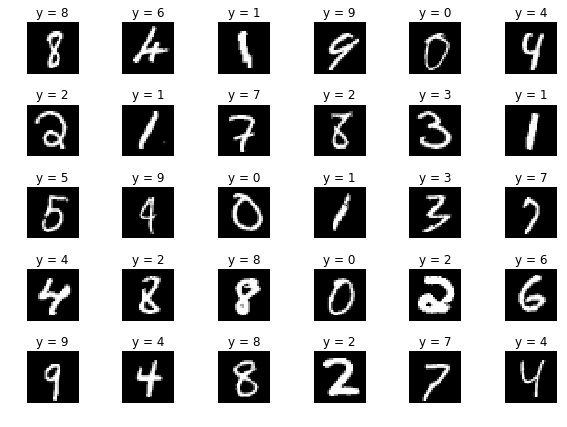

In [23]:
indices = np.random.choice(testY.size,30)

fig = plt.figure()
for i in range (30):
    img = testX[:,indices[i]].reshape(28,28)
    fig.add_subplot(5,6,i+1)
    plt.imshow(img,cmap='gray')
    plt.title('y = '+str(pred_y[indices[i]]))
    plt.axis("off")
    
plt.subplots_adjust(hspace = 0.6)   
plt.show()